In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        errors.append(np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1, errors
        x = x_new
    return x, max_iterations, errors


In [32]:
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        errors.append(np.linalg.norm(x_new - x, ord=np.inf))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1, errors
        x = x_new
    return x, max_iterations, errors

In [36]:
def plotter(A,b,x0,tol,max_iterations):
    x0 = np.zeros_like(b)
    gauss_x , gauss_iterations, gauss_errs = gauss_seidel(A,b,x0,tol,max_iterations)
    x0 = np.zeros_like(b)
    jacobi_x, jacobi_iterations ,jacobi_errs = jacobi(A,b,x0,tol,max_iterations)
    print(f"Jacobi #iterations : {jacobi_iterations} | gauss #iterations: {gauss_iterations} ")
    plt.plot(np.arange(1,gauss_iterations+1), gauss_errs, label= "Gauss")
    plt.xlabel("# of iterations")
    plt.ylabel("|x_new - x|")
    plt.title(f"Gauss-Seidel absolute error with tolerance of {tol}")
    plt.plot(np.arange(1,jacobi_iterations+1), jacobi_errs, label = "Jacobi")
    plt.xlabel("# of iterations")
    plt.ylabel("|x_new - x|")
    plt.title(f"Jacobi method absolute error with tolerance of {tol}")
    plt.legend()
    plt.yscale('log')
    plt.show()
    

Jacobi #iterations : 4 | gauss #iterations: 4 


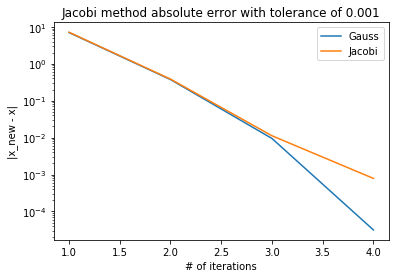

Jacobi #iterations : 7 | gauss #iterations: 5 


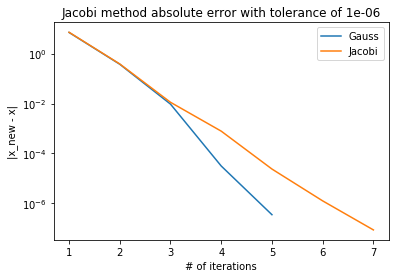

Jacobi #iterations : 9 | gauss #iterations: 7 


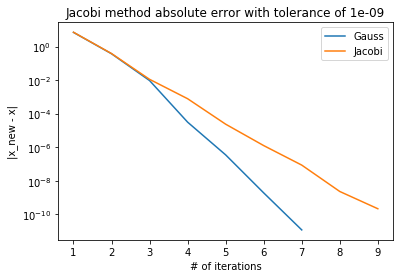

In [37]:
A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])
b = np.array([7.85, -19.3, 71.4])
x0 = np.array([0,0,0])
max_iterations = 100
tols = (1e-3,1e-6,1e-9)
for tol in tols:
    plotter(A,b,x0,tol,max_iterations)


In [ ]:
###As you increase the tolerance you increase the number of iterations needed to converge.
# This is because as you increase tolerance you need have a higher threshold to reach 'convergence'.